In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import logging

import paths
import sys

sys.path+=paths.LIBRARY_PATH

from moopt.scalarization_interface import scalar_interface, single_interface, w_interface
from moopt.monise import monise

from main_xsquared import xsquared

/home/marcos/Documents/Experiments/envs/general/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [3]:
def runMONISE(d, node_gap=0.0, node_tlimit=float('inf')):
    wscalar_ = sscalar_ = xsquared(d)
    
    moo_ = monise(weightedScalar = wscalar_, singleScalar = sscalar_, targetGap=0.000, targetSize=M*100, 
                 redFact=float('inf'), smoothCount=None, nodeTimeLimit=node_tlimit, nodeGap= node_gap)
    moo_.optimize()
    objs = np.array([s.objs for s in moo_.solutionsList])
    imps = moo_.importances
    
    return objs, imps

## Plotting 

In [4]:
try:
    objs = np.loadtxt('plots/xs_objs.csv')
    imps = np.loadtxt('plots/xs_imps.csv')
except:
    M = 3
    d = np.ones(M)#
    d = d/d.max()
    
    objs, imps = runMONISE(d)
    
    np.savetxt('plots/xs_objs.csv', objs)
    np.savetxt('plots/xs_imps.csv', imps)

<IPython.core.display.Javascript object>


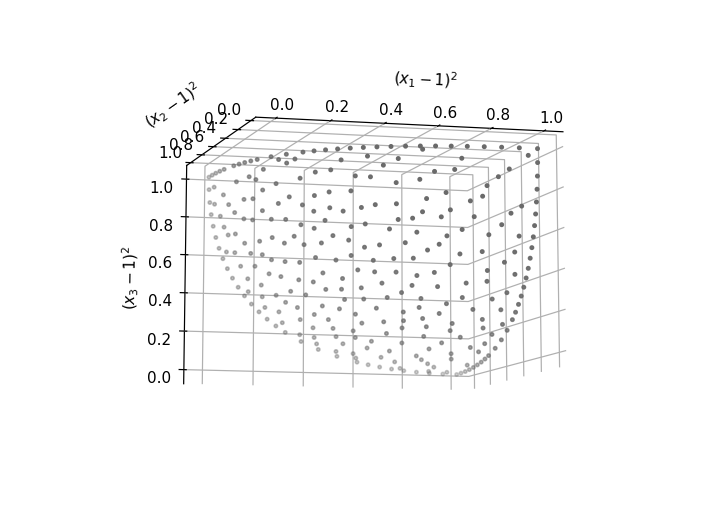

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#sns.set_style("ticks")
#plt.rc('text', usetex=True)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.scatter(objs[:,0], objs[:,1], objs[:,2], c='dimgrey', marker='.')#, c=c, marker=m)
ax.set_xlabel(r'$(x_1-1)^2$')
ax.set_ylabel(r'$(x_2-1)^2$')
ax.set_zlabel(r'$(x_3-1)^2$')
plt.show()

<IPython.core.display.Javascript object>


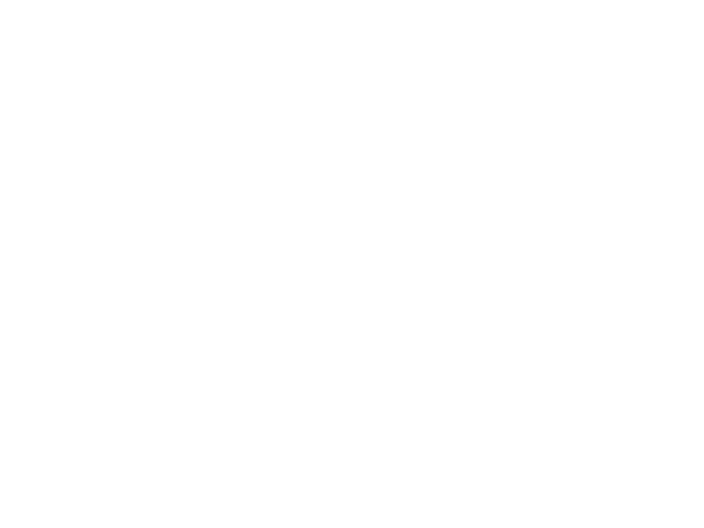

In [6]:
plt.savefig('plots/xsquared_front2.pdf', transparent=True, bbox_inches='tight', pad_inches=0.25)

## Ploting convergence

<IPython.core.display.Javascript object>


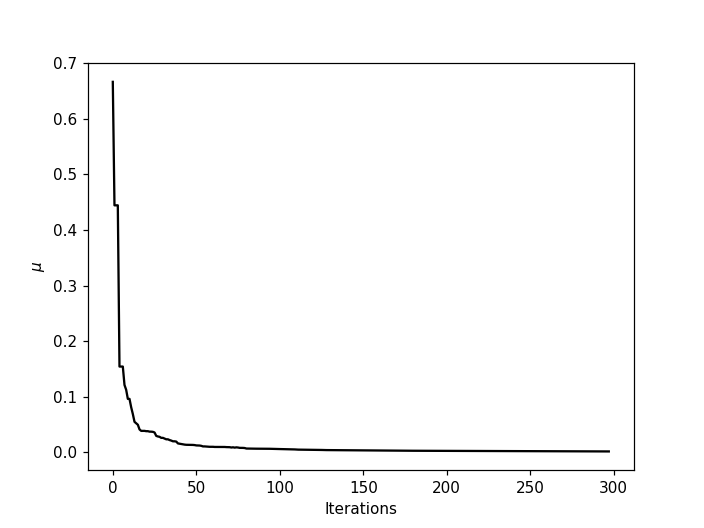

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
plt.plot([i for i in range(len(imps))],imps, c='k')
plt.xlabel('Iterations')
plt.ylabel(r'$\mu$')
plt.show()

<IPython.core.display.Javascript object>


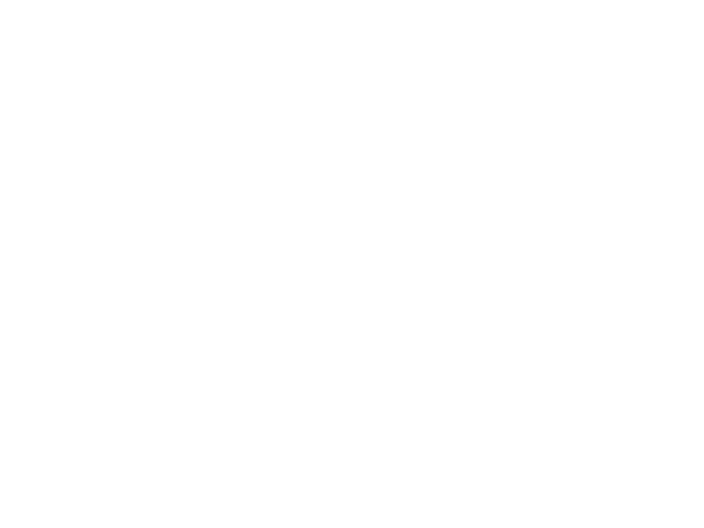

In [8]:
plt.savefig('plots/mu_evolution.pdf', transparent=True, bbox_inches='tight')

## Ploting parameter convergence

In [9]:
#run main_xquared.py first
analysis_HV = np.loadtxt('plots/analysis_HV.csv')
analysis_time = np.loadtxt('plots/analysis_time.csv')

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
time_limits = [10000, 600, 300, 120, 60, 30, 10, 5, 2, 1]
gaps = [0.0001, 0.001, 0.01, 0.1]

#analysis = analysis_time/analysis_HV
analysis = analysis_HV#/analysis_time
print(analysis.shape)

for gap, ana in zip(gaps, analysis):
    plt.semilogx(time_limits, ana, label=gap)#, c='--')

plt.xlabel('Node time limits')
plt.ylabel('Hivervolume')
plt.legend()
plt.show()

(4, 10)
